In [1]:
from src.features.mapping import SemanticMap3DBuilder
import numpy as np
import pathlib
import os
from yacs.config import CfgNode
from src.model.perception.perception_pipeline_config import get_perception_cfg
from src.model.perception.evaluation import get_ground_truth
from src.model.perception.labeler import LabelGenerator
from matplotlib import pyplot as plt
import torch

In [2]:
if pathlib.PurePath(os.getcwd()).name == "notebooks":
    print(pathlib.PurePath(os.getcwd()).name)
    os.chdir("..")

notebooks


In [5]:
scene_id = '00006-HkseAnWCgqk'
epoch = 0
TRAJECTORY_DIR = pathlib.Path('data') / 'interim' / 'trajectories' / '23-05-25,06:11:12' / f'epoch_{epoch}' / scene_id
SEMANTIC_INFO_PATH = (pathlib.Path('data') / 'raw' / 'train' / 'scene_datasets' / 'hm3d' / 'train' 
                      / scene_id / f'{scene_id.split("-")[1]}.semantic.txt')

In [6]:
i = 142
semantics = np.load(TRAJECTORY_DIR / 'Semantic' / f'{i}.npy')

truth_dict = get_ground_truth(semantics, SEMANTIC_INFO_PATH)

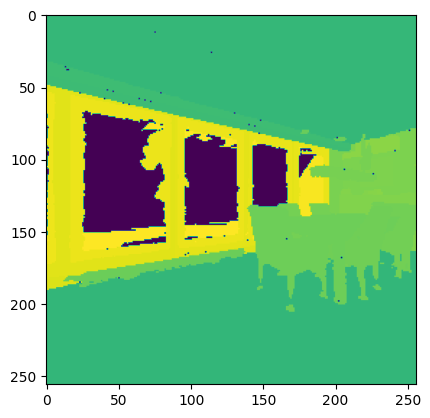

In [9]:
i = 142
plt.imshow(semantics)

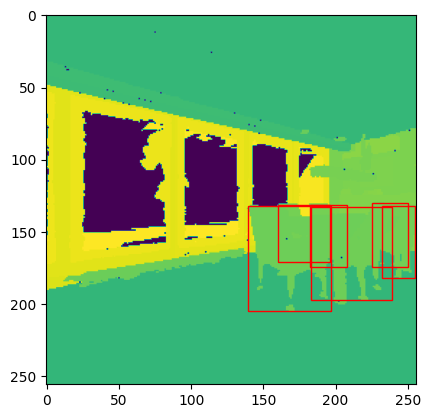

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy import ndimage

# create a figure and axes
fig, ax = plt.subplots(1)

# display the image
ax.imshow(semantics)

# for each object, add a rectangle to the axes
for box in truth_dict['boxes']:
    # get the (x, y) start coordinates and the width and height
    x_start, y_start = box[1], box[0]
    width = box[3] - box[1]
    height = box[2] - box[0]
    
    # create a rectangle patch
    rect = patches.Rectangle((x_start, y_start), width, height, linewidth=1, edgecolor='r', facecolor='none')

    # add the patch to the axes
    ax.add_patch(rect)

# finally, show the plot
plt.show()